<a href="https://colab.research.google.com/github/argyaWicaksana/PCVK-College/blob/main/Week11_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Argya Wicaksana
# TI3B / 06

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Implementasikan 6 metode template matching

In [ ]:
img_1 = cv2.imread('/content/cats_and_bunnies.jpg')
img_2 = cv2.imread('/content/cat2_templatejpg.jpg')

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

In [ ]:
def match_template(img, tmpl_img, method):
  img_rgb = img.copy()
  tmpl_size = tmpl_img.shape

  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  tmpl_img = cv2.cvtColor(tmpl_img, cv2.COLOR_BGR2GRAY)

  result = cv2.matchTemplate(img, tmpl_img, method)
  (_, value, _, (x, y)) = cv2.minMaxLoc(result)
  cv2.rectangle(img_rgb, (x, y), (x + tmpl_size[1], y + tmpl_size[0]), (0, 0, 255), 3)

  return img_rgb

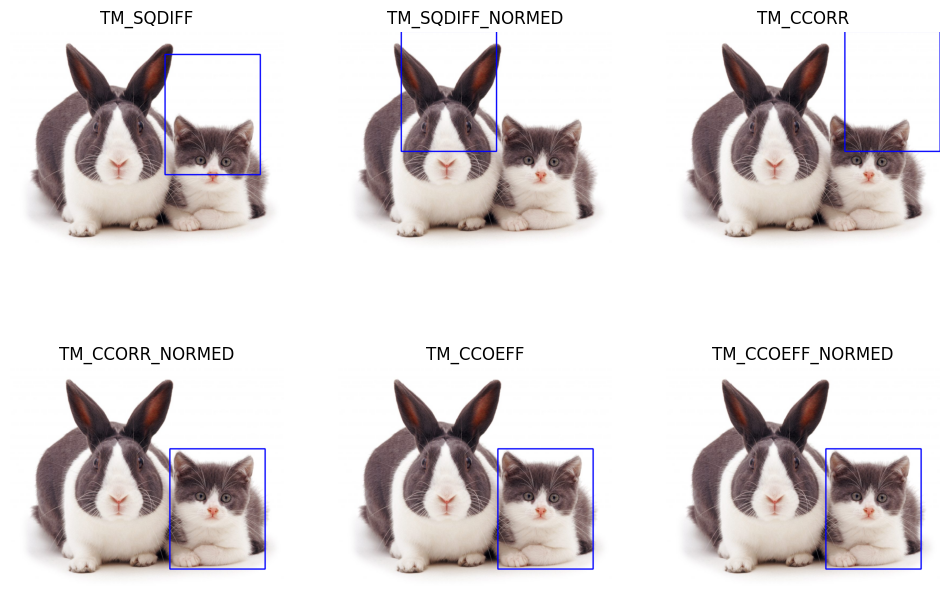

In [ ]:
methods = {
    'TM_SQDIFF': cv2.TM_SQDIFF,
    'TM_SQDIFF_NORMED': cv2.TM_SQDIFF_NORMED,
    'TM_CCORR': cv2.TM_CCORR,
    'TM_CCORR_NORMED': cv2.TM_CCORR_NORMED,
    'TM_CCOEFF': cv2.TM_CCOEFF,
    'TM_CCOEFF_NORMED': cv2.TM_CCOEFF_NORMED,
}

plt.figure(figsize=(12, 8))
for i, method in enumerate(methods):
  plt.subplot(2, 3, i + 1)
  result = match_template(img_1, img_2, methods[method])
  plt.imshow(result)
  plt.title(method)
  plt.axis('off')

## Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object

In [ ]:
img_3 = cv2.imread('/content/bahrain.jpg')
img_4 = cv2.imread('/content/bahrain-template.jpg')

In [ ]:
def template_match_multiple_obj(img, tmpl):
  threshold = 0.43
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  tmpl = cv2.cvtColor(tmpl, cv2.COLOR_BGR2GRAY)
  w, h = tmpl.shape[::-1]
  result = cv2.matchTemplate(img_gray, tmpl, cv2.TM_CCOEFF_NORMED)
  loc = np.where(result >= threshold)

  for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 1)

  return img

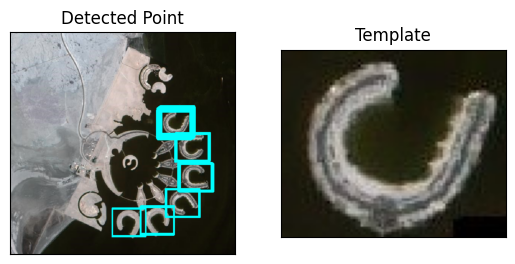

In [ ]:
result = template_match_multiple_obj(img_3, img_4)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(result)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Detected Point')
ax[1].imshow(img_4, cmap='gray')
ax[1].set_title('Template')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

## Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection

In [ ]:
img_5 = cv2.imread('/content/car-park.jpg')

In [ ]:
def edge_detection(img, method):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.GaussianBlur(gray, (3, 3), 0)

  if method == 'sobel':
    img_sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    img_sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    edge_image = cv2.addWeighted(cv2.convertScaleAbs(img_sobelx), 0.5, cv2.convertScaleAbs(img_sobely), 0.5, 0)
  elif method == 'canny':
    edge_image = cv2.Canny(img, 100, 200)
  elif method == 'laplacian':
    edge_image = cv2.Laplacian(img, cv2.CV_64F)
    edge_image = cv2.convertScaleAbs(edge_image)
  else:
    edge_image = img

  return edge_image

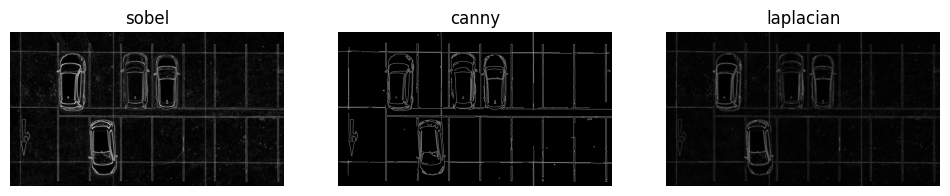

In [ ]:
methods = ['sobel', 'canny', 'laplacian']

plt.figure(figsize=(12, 8))
for i, method in enumerate(methods):
  plt.subplot(2, 3, i + 1)
  result = edge_detection(img_5, method)
  plt.imshow(result, cmap='gray')
  plt.title(method)
  plt.axis('off')

## Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection

In [ ]:
img_6 = cv2.imread('/content/chess-board.jpg')
img_6 = cv2.cvtColor(img_6, cv2.COLOR_BGR2RGB)

In [ ]:
def corner_detection(img, method):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  if method == 'harris':
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)
    img[corners > 0.01 * corners.max()] = [0, 0, 255]
  elif method == 'shi_tomasi':
    corners = cv2.goodFeaturesToTrack(gray, 25, 0.01, 10)
    corners = np.int0(corners)
    for corner in corners:
      x, y = corner.ravel()
      cv2.circle(img, (x, y), 3, 255, -1)
  else:
    corners = gray

  return img

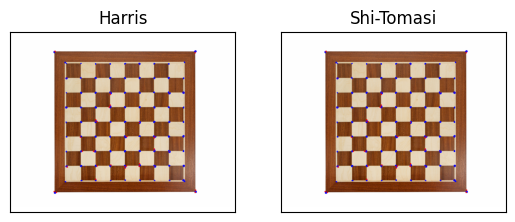

In [ ]:
harris = corner_detection(img_6, 'harris')
shi_tomasi = corner_detection(img_6, 'shi_tomasi')

fig, ax = plt.subplots(1, 2)
ax[0].imshow(harris, cmap='gray')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Harris')
ax[1].imshow(shi_tomasi, cmap='gray')
ax[1].set_title('Shi-Tomasi')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

## Implementasikan metode Hough Transform

In [ ]:
img_7 = cv2.imread('/content/sudoku.jpg')

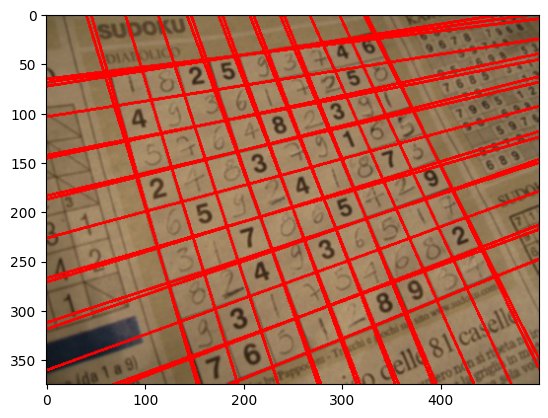

In [ ]:
gray = cv2.cvtColor(img_7,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,90,150,apertureSize = 3)
kernel = np.ones((3,3),np.uint8)
edges = cv2.dilate(edges,kernel,iterations = 1)
kernel = np.ones((5,5),np.uint8)
edges = cv2.erode(edges,kernel,iterations = 1)
lines = cv2.HoughLines(edges,1,np.pi/180,150)

if not lines.any():
    print('No lines were found')
    exit()

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img_7,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(cv2.cvtColor(img_7, cv2.COLOR_BGR2RGB))

## Implementasikan fungsi findContours() pada OpenCV

In [ ]:
img_8 = cv2.imread('/content/laptop.jpg')
img_8 = cv2.cvtColor(img_8, cv2.COLOR_BGR2RGB)

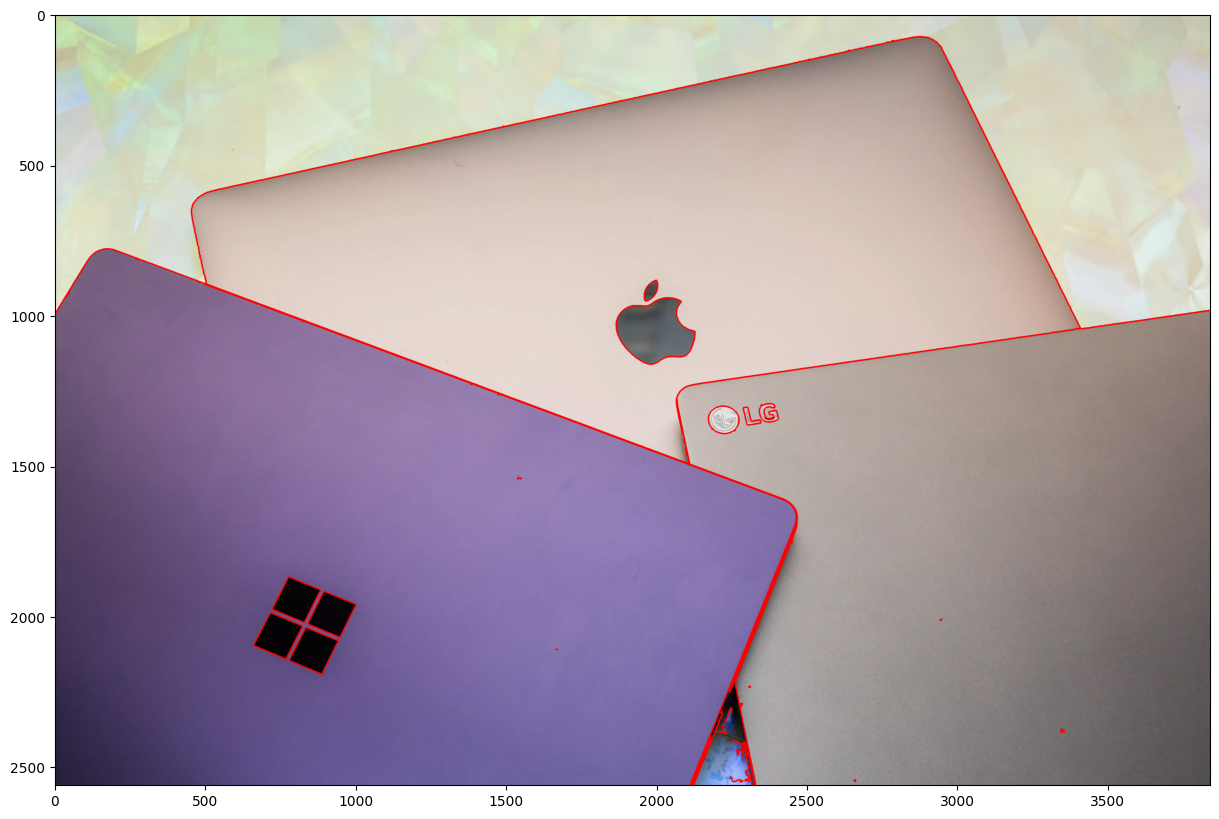

In [ ]:
edged = cv2.Canny(img_8, 30, 200)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_8, contours, -1, (0,0,255), 3)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img_8, cv2.COLOR_BGR2RGB))